In [ ]:
                            #Building The House Price Prediction System 

In [8]:
#importing the Libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score
import matplotlib.pyplot as plt


In [9]:
#Load the DataSet
data=pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
#Data PreProcessing 

# Feature selection
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "yr_built", "yr_renovated"]
target = "price"

# Handle missing values
data = data.fillna(data.mean())  # Impute missing values with mean

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

C:\Users\KIIT\AppData\Local\Temp/ipykernel_11372/150321191.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())  # Impute missing values with mean


In [11]:
#Model Training 

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Precision is not directly applicable for regression problems, but we can calculate R-squared as a measure of accuracy
print("RMSE:", rmse)
print("R-squared:", r2)

RMSE: 993544.3503956579
R-squared: 0.032079307046427474


In [15]:
# Test case for a new house
#new_house = {
 #   "bedrooms": 3,
  #  "bathrooms": 2,
   # "sqft_living": 1500,
   # "sqft_lot": 5000,
   # "floors": 2,
   # "waterfront": 0,
   # "view": 0,
   # "condition": 5,
   # "yr_built": 2000,
   # "yr_renovated": 2015
#}

b=int(input("Enter the Number of Bedrooms in New House : "))
bt=int(input("Enter the Number of Bathrooms in New House : "))
sqt=int(input("Enter the Square Feet of Living : "))
floors=int(input("Enter the Number of Floors : "))

new_house = {
    "bedrooms": b,
    "bathrooms": bt,
    "sqft_living": sqt,
    "sqft_lot": 5000,
    "floors": floors,
    "waterfront": 0,
    "view": 0,
    "condition": 5,
    "yr_built": 2000,
    "yr_renovated": 2015
}

predicted_price = model.predict(pd.DataFrame([new_house]))[0]
print("Predicted price for the new house:", predicted_price)

Enter the Number of Bedrooms in New House : 3
Enter the Number of Bathrooms in New House : 2
Enter the Square Feet of Living : 2000
Enter the Number of Floors : 3
Predicted price for the new house: 605403.2273685774


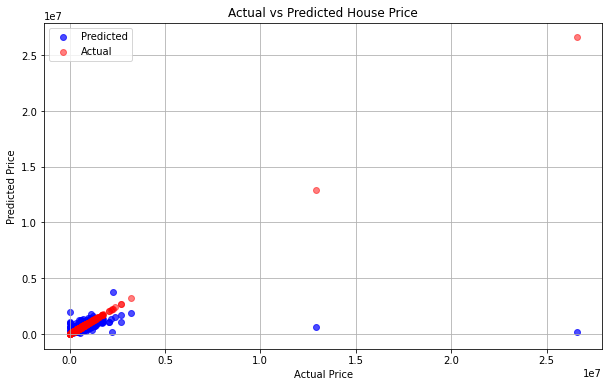

In [16]:
# Plot the actual vs predicted price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.7, label='Predicted')
plt.scatter(y_test, y_test, c='red', alpha=0.5, label='Actual')
plt.title('Actual vs Predicted House Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()